## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how= 'outer')

# Display the data table for preview
mouse_study_data.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_study_data['Mouse ID'].unique())
mouse_count

249

In [3]:
#determining 
mouse_study_data['Mouse ID'].value_counts()


g989    13
k894    10
c757    10
j755    10
a251    10
        ..
t573     1
n482     1
v199     1
h428     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
#obtaining uplicate mouse id data
duplicate_id = mouse_study_data.loc[mouse_study_data['Mouse ID'] == 'g989',:]
duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study_data.loc[mouse_study_data['Mouse ID'] != 'g989',:]

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_study_clean['Mouse ID'].unique())
mouse_count

248

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#create object of study data by drug administered
study_grouped_drug = mouse_study_clean.groupby('Drug Regimen')

#create series of statistics describing tumor volume
drug_means = study_grouped_drug['Tumor Volume (mm3)'].mean()
drug_medians = study_grouped_drug['Tumor Volume (mm3)'].median()
drug_variance = study_grouped_drug['Tumor Volume (mm3)'].var()
drug_stdev = study_grouped_drug['Tumor Volume (mm3)'].std()
drug_sem = study_grouped_drug['Tumor Volume (mm3)'].sem()

#create summary dataframe
drug_stats = pd.DataFrame(
    {'Mean': drug_means,
    'Median': drug_medians,
    'Variance': drug_variance,
    'Standard Deviation': drug_stdev,
    'Standard Error': drug_sem})

#print summary
drug_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line

#create summary dataframe from original data
study_stats = mouse_study_clean['Tumor Volume (mm3)'].groupby(mouse_study_clean['Drug Regimen']).agg(['mean', 'median', 'var', 'std', 'sem'])

#print summary
study_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

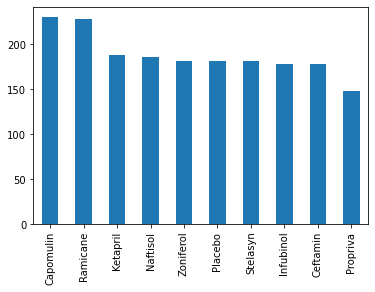

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_study_clean['Drug Regimen'].value_counts().plot(kind = 'bar')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

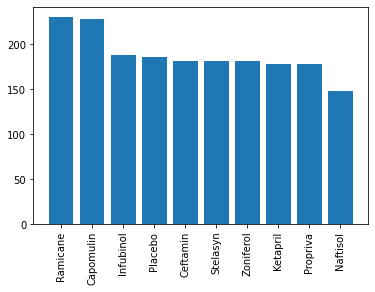

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen = mouse_study_clean['Drug Regimen'].unique()
regimen_counts = mouse_study_clean['Drug Regimen'].value_counts()

x_axis = np.arange(len(regimen_counts))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, regimen_counts)
plt.xticks(tick_locations, regimen, rotation = 'vertical')
plt.show

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


pies = ["Apple", "Pumpkin", "Chocolate Creme", "Cherry", "Apple Crumb", "Pecan", "Lemon Meringue", "Blueberry", "Key Lime", "Peach"]
pie_votes = [47,37,32,27,25,24,24,21,18,16]
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(pie_votes, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../Images/PyPies.png'

## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [42]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [43]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [45]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
